# Coding a Two-Layer, Feed-forward Neural Network
This file illustrates the training of a two-layer neural network, using sigmoid activation functions.

This is meant to be a simpele implementation of how gradient descent and back-propagation work, and this code has not been built to be particularly flexible or efficient.  Additionally, the output units use a sigmoid activation function, which can have difficulty converging for values to the extremes of the [0, 1] range.  

At the end of this code, it is demonstrated that this network architecture can be used to reliably learn any boolean function (the sigmoid output layers are simply rounded to 0 or 1).  This represents an improvement on the single-layer perceptron (shown in a separate file in this repository), which is unable to learn the target functions of XOR (or its complement XNOR).

In [365]:
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
import random

In [366]:
def sigmoid_node(inputs, weights): #computes the output of a single node using the sigmoid activation function
    linear_sum = 0
    for i in range(0, len(inputs)):
        linear_sum += inputs[i]*weights[i]
    sigmoid = 1/(1+exp(-linear_sum))
    return sigmoid

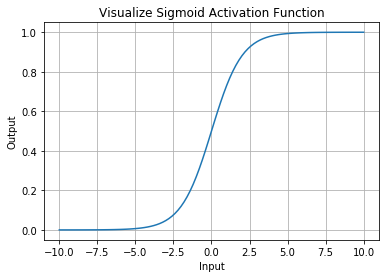

In [364]:
#Demonstrate sigmoid activation function
x = np.linspace(-10, 10, 101)
y = [node_output([i], [1]) for i in x]
plt.plot(x, y)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Visualize Sigmoid Activation Function")
plt.grid(True)
plt.show()

In [57]:
def linear_node(inputs, weights): #computes the output of a single node using the sigmoid activation function
    linear_sum = 0
    for i in range(0, len(inputs)):
        linear_sum += inputs[i]*weights[i]
    return linear_sum

In [203]:
def network_output(inputs, weights, hidden, output): #computes output of entire network given number of hidden nodes, number of output nodes, and current weights
        hidden_layer = [] #stores results from hidden nodes
        output_layer = [] #stores results from output nodes
        for i in range(0, hidden): # product outputs for all hidden nodes
            hidden_layer.append(sigmoid_node(inputs, weights[i]))
        for i in range(1, output+1): #produce outputs for all output nodes
            output_layer.append(sigmoid_node(hidden_layer, weights[-i]))
        return hidden_layer, output_layer
            

In [221]:
def update_weights(inputs, hidden_layer, output_layer, target, weights, learning_rate): # updates weights using back-propagation
    output_deltas = []
    hidden_deltas = []
    new_weights = weights
    for i in range(0, len(output_layer)):
        output_deltas.append(output_layer[i]*(1-output_layer[i])*(target[i]- output_layer[i]))
    for i in range(0, len(hidden_layer)):
        #gather error terms from all output nodes:
        error_sum = 0
        for j in range(0, len(output_layer)):
            error_sum += weights[-(j+1)][i]*output_deltas[j]
        hidden_deltas.append(hidden_layer[i] * (1 - hidden_layer[i]) * error_sum)
    #update output layer weights:
    for i in range(1, len(output_layer)+1):
        for j in range(0, len(weights[-i])):
            weights[-i][j] = weights[-i][j] + learning_rate*output_deltas[i-1]* hidden_layer[j]
    #update hidden layer weights:
    for i in range(0, len(hidden_layer)):
        for j in range(0, len(weights[i])):
            weights[i][j] = weights[i][j] + learning_rate*hidden_deltas[i] * inputs[j]
    return weights
    ###FINISH BY ACTUALLY UPDATING WEIGHTS
    

In [287]:
def initialize_weights(inputs, hidden_units, outputs):
    weights = [[]]*(hidden_units+ outputs)
    for i in range(0, hidden_units):
        new_weights = []
        for j in range(0, inputs):
            new_weights.append(round(random.uniform(-1, 1), 1)) #initialize all weights to random numbers between -.05 and .05
        weights[i] = new_weights
    for i in range(1, outputs+1):
        new_weights = []
        for j in range(0, hidden_units):
            new_weights.append(round(random.uniform(-1, 1), 1))
        weights[-i] = new_weights
    return weights

In [307]:
def train_neural_net(train_x, train_y, hidden_units, iterations, learning_rate): #trains neural network for number of iterations specified
    weights = initialize_weights(len(train_x[0]), hidden_units, len(train_y[0])) #initialize weights array based on number of inputs, hidden units and number of outputs being predicted
    for i in range(0, iterations): # iterate through all training examples n times
        for j in range(0, len(train_x)):
            hidden_layer, output_layer = network_output(train_x[j], weights, hidden_units, len(train_y[0]))
    #        #if output != train_y[j]: #only update weights if example is misclassified
            weights = update_weights(train_x[j], hidden_layer, output_layer, train_y[j], weights, learning_rate)
            #print(weights)
    training_results = []
    for j in train_x:
        hidden, output = network_output(j, weights, hidden_units, len(train_y[0]))
        training_results.append([round(i) for i in output])
    return training_results

In [308]:
#weights = initialize_weights(len(train_x[0]), hidden_units, len(train_y[0]))
train_x = [[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]]
train_y = [[0], [1], [1], [0]]
hidden_units = 3
iterations = 1000
learning_rate = .4

In [309]:
#trial:
train_neural_net(train_x, train_y, hidden_units, iterations, learning_rate)

[[0], [1], [1], [0]]

In [325]:
boolean = {"false_" :      {"target": [[0], [0], [0], [0]]}, 
           "and_" :        {"target": [[0], [0], [0], [1]]}, 
           "a_and_not_b" : {"target": [[0], [1], [0], [0]]},
            "a_":          {"target": [[0], [1], [0], [1]]},
           "not_a_and_b" : {"target": [[0], [0], [1], [0]]},
           "b_" :          {"target": [[0], [0], [1], [1]]},
           "x_or" :        {"target": [[0], [1], [1], [0]]},
           "or_" :         {"target": [[0], [1], [1], [1]]},
           "nor_" :        {"target": [[1], [0], [0], [0]]},
           "x_nor" :       {"target": [[1], [0], [0], [1]]},
           "not_b" :       {"target": [[1], [1], [0], [0]]},
           "a_or_not_b" :  {"target": [[1], [1], [0], [1]]},
           "not_a" :       {"target": [[1], [0], [1], [0]]},
           "not_a_or_b":   {"target": [[1], [0], [1], [1]]},
           "nand" :        {"target": [[1], [1], [1], [0]]},
           "true_" :       {"target": [[1], [1], [1], [1]]}}


In [362]:
results = {}
for i in boolean:
        results[i] = train_neural_net(train_x, boolean[i]["target"], hidden_units = 4, iterations = 10000, learning_rate = .3)
        if results[i] == boolean[i]["target"]:
            boolean[i]["Status"] = "Success"
        else:
            boolean[i]["Status"] = "Failure"


In [363]:
df = pd.DataFrame(boolean).transpose()
df #shows that a single perceptron can represent any boolean valued function except for: "XOR" and "XNOR"

,Status,target
a_,Success,"[[0], [1], [0], [1]]"
a_and_not_b,Success,"[[0], [1], [0], [0]]"
a_or_not_b,Success,"[[1], [1], [0], [1]]"
and_,Success,"[[0], [0], [0], [1]]"
b_,Success,"[[0], [0], [1], [1]]"
false_,Success,"[[0], [0], [0], [0]]"
nand,Success,"[[1], [1], [1], [0]]"
nor_,Success,"[[1], [0], [0], [0]]"
not_a,Success,"[[1], [0], [1], [0]]"
not_a_and_b,Success,"[[0], [0], [1], [0]]"
